# Задача

Найти минимум функции на множестве: $$\min\limits_{x\in X}f(x)$$

## Множество

$X\in\mathbb{R}^n$, $n\in\{100, 200, 500, 1000\}$

1. $X$ симплекс
2. $X$ сфера

## Функция

$$f(x) = x^TAx - b^Tx$$

$А$ — 
* случайная [0,L] матрица
* элементы равномерно распределены
* регуляризованная как 
$A - \lambda_{\min}(A)I$, где $I$ — единичная матрица

## Методы
1. Градиентный спуск (Правило Армихо, критерий остановки)
2. Субградиенты (постоянный шаг, Шаг по Поляку)
3. Зеркальный спуск с Энтропийным сетапом 
4. Быстрые градиенты Нестерова
5. Градиентный спуск в 1 норме (если дойдем)

## Графики

1. Производительность
2. Убывание функционала либо невязки

In [133]:
import numpy as np
from numpy import linalg
%matplotlib inline
import matplotlib.pyplot as plt

In [325]:
n = 200
L = 1.
A = np.random.rand(n, n) * L
A = (A + A.T) / 2
A = A - np.eye(n) * np.min(linalg.eig(A)[0])

In [326]:
print linalg.det(A)
print linalg.eig(A)[0]

2.09493718297e+122
[  1.057e+02   1.154e+01   3.375e-14   1.129e+01   1.116e+01   2.048e-01
   1.096e+01   3.932e-01   4.880e-01   1.079e+01   1.073e+01   5.932e-01
   6.975e-01   7.863e-01   8.217e-01   8.500e-01   1.056e+01   1.047e+01
   1.022e+00   1.101e+00   1.038e+01   1.188e+00   1.030e+01   1.027e+01
   1.024e+01   1.018e+01   1.009e+01   1.259e+00   1.327e+00   1.360e+00
   9.993e+00   1.432e+00   1.483e+00   9.886e+00   9.833e+00   9.801e+00
   9.689e+00   9.679e+00   1.604e+00   1.643e+00   9.575e+00   1.711e+00
   1.754e+00   1.799e+00   1.823e+00   9.483e+00   9.427e+00   9.339e+00
   9.323e+00   9.299e+00   2.044e+00   2.082e+00   9.148e+00   9.121e+00
   9.072e+00   9.041e+00   2.129e+00   9.015e+00   2.188e+00   8.934e+00
   2.245e+00   2.287e+00   8.896e+00   8.854e+00   8.841e+00   2.366e+00
   8.762e+00   8.709e+00   2.403e+00   2.459e+00   2.517e+00   8.630e+00
   8.596e+00   2.561e+00   2.563e+00   2.606e+00   2.626e+00   8.529e+00
   2.707e+00   2.734e+00   8.491

In [327]:
# Вектор b
b=np.random.rand(n)

In [328]:
# Градиент функции
def grad(x):
    return(np.dot(A, x) - b)

In [329]:
# Функция
def func(x):
    return(0.5 * np.dot(x.T, np.dot(A, x))-np.dot(b, x))

In [330]:
def p(x):
    norm = linalg.norm(x)
    if norm <= 1:
        return(x)
    else:
        return(x / norm)
def dist(x):
    return(linalg.norm(x - p(x)))

In [331]:
def armiho(x, a0, theta, eps):
    # Выбор шага по Армихо
    a = a0
    grad_norm_2 = np.linalg.norm(grad(x)) ** 2
    while True:
        x_new = x - a * grad(x)
        if func(x_new) - func(x) + eps * a * grad_norm_2 < 0:
            break
        a *= theta
    return a

In [376]:
# Массив с точками
x = list()
x.append(np.zeros(n))
i = 1

# Выбор шага по Армихо, параметры
a0 = 1
theta = 0.8
eps = 0.1

# Условия остановки
grad_norm=1e-6
maxiter=500
x_norm=1e-6

while True:
    x.append(0)
    
    a = armiho(x[i - 1], a0, theta, eps)
    # Градиентный шаг
    x[i] = x[i - 1] - a * grad(x[i - 1])
    #x[i] = p(x[i])
    
    norm_new = np.linalg.norm(grad(x[i]))
    #print a, x[i], func(x[i]), norm_new, dist(x[i])
    
    # Условия останова
    if norm_new < grad_norm:
        break
    
    if np.linalg.norm(x[i] - x[i - 1]) < x_norm:
        break
    
    if i >= maxiter:
        break
        
    i += 1

Best: 500 f = -3.06938758125
Last: 501


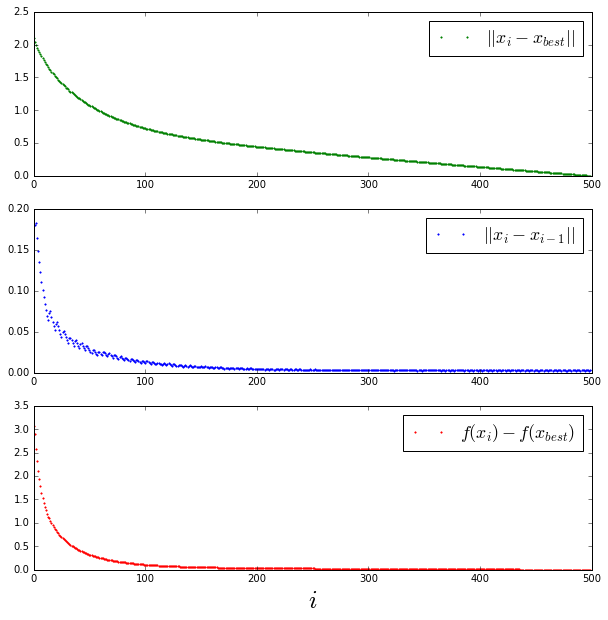

In [377]:
def method_info(x):
    y = np.zeros((len(x)))
    x_dist = np.zeros((len(x)))
    step = np.zeros((len(x)))

    for i in range(len(x)):
        y[i] = func(x[i])
        x_dist[i] = linalg.norm(x[i]-p(x[i]))
        
        if i >= 1:
            step[i] = linalg.norm(x[i] - x[i - 1])
        
    imin = np.argmin(y)
    y -= func(x[imin])
    
    x_diff_norm = linalg.norm(x[:]-x[imin], axis=1)

    ms = 3
    
    print "Best: " + str(imin) + " f = " + str(func(x[imin]))
    print "Last: " + str(len(x))
    
    plt.figure(figsize=(10,10))
    plt.subplot(3, 1, 1)
    plt.plot(x_diff_norm, 'g.', label=r"$||x_i-x_{best}||$", ms=ms)
    plt.legend(loc='upper right', fontsize=18)
    #plt.xlabel('$i$', fontsize=25)
    
    plt.subplot(3, 1, 2)
    plt.plot(step, 'b.', label=r"$||x_i-x_{i-1}||$", ms=ms)
    plt.legend(loc='upper right', fontsize=18)
    #plt.xlabel('$i$', fontsize=25)
    
    plt.subplot(3, 1, 3)
    plt.plot(y, 'r.', label=r"$f(x_i)-f(x_{best})$", ms=ms)
    plt.legend(loc='upper right', fontsize=18)
    plt.xlabel('$i$', fontsize=25)
    
    #plt.savefig("chart.png")

    # display plot on screen
    plt.show()
method_info(x)

In [ ]:
def newl(l):
    return(1 + np.sqrt(1 + 4 * l ** 2)) / 2

In [ ]:
# Массив с точками
l = list()
x = list()
x.append(np.zeros(n))
l.append(newl(0))
i = 1

# Условия остановки
grad_norm=1e-6
maxiter=500
x_norm=1e-6

while True:
    x.append(0)
    
    l[i] = (1 + np.sqrt(1 + 4 * l[i - 1] ** 2)) / 2
    gamma = 1 - l[i - 1]
    x[i] = x[i - 1] - a * grad(x[i - 1])
    
    norm_new = np.linalg.norm(grad(x[i]))
    #print a, x[i], func(x[i]), norm_new, dist(x[i])
    
    # Условия останова
    if norm_new < grad_norm:
        break
    
    if np.linalg.norm(x[i] - x[i - 1]) < x_norm:
        break
    
    if i >= maxiter:
        break
        
    i += 1

In [336]:
x=np.array([1,2,3])

In [345]:
x[1:]-x[:-1]

array([1, 1])